# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")


# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate (cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | semnan
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | whitehorse
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | cafayate
Processing Record 7 of Set 1 | igarka
Processing Record 8 of Set 1 | carolina beach
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | cam ranh
Processing Record 12 of Set 1 | tindouf
Processing Record 13 of Set 1 | ust-nera
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | mandera
Processing Record 17 of Set 1 | port augusta
Processing Record 18 of Set 1 | passau
Processing Record 19 of Set 1 | coquimbo
Processing Record 20 of Set 1 | puerto madryn
Processing Record 21 of Set 1 | nemuro
Processing Record 22 of Set 1 | taiohae
City not 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data, columns=['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date'])

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,294.08,68,0,2.06,US,1718503102
1,semnan,35.5729,53.3971,298.32,43,0,1.42,IR,1718503382
2,iqaluit,63.7506,-68.5145,276.00,93,100,2.06,CA,1718503323
3,whitehorse,60.7161,-135.0538,291.10,45,75,6.69,CA,1718503274
4,puerto natales,-51.7236,-72.4875,273.02,93,100,1.70,CL,1718503239


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,294.08,68,0,2.06,US,1718503102
1,semnan,35.5729,53.3971,298.32,43,0,1.42,IR,1718503382
2,iqaluit,63.7506,-68.5145,276.00,93,100,2.06,CA,1718503323
3,whitehorse,60.7161,-135.0538,291.10,45,75,6.69,CA,1718503274
4,puerto natales,-51.7236,-72.4875,273.02,93,100,1.70,CL,1718503239


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

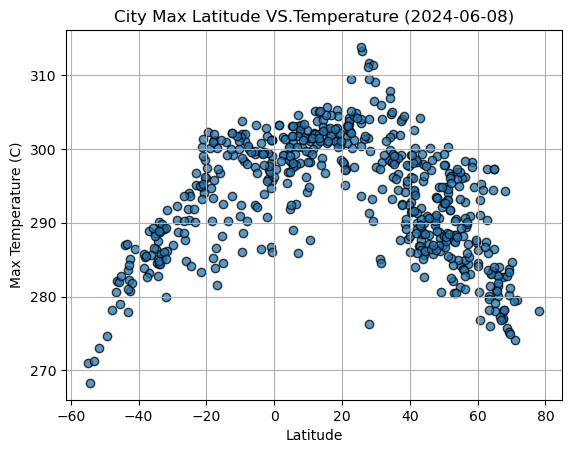

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = "o", edgecolors = "black", alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude VS.Temperature (2024-06-08)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

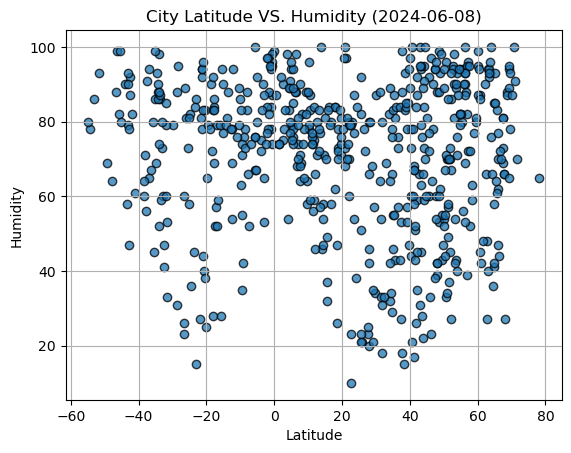

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o", edgecolors = "black", alpha = 0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude VS. Humidity (2024-06-08)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

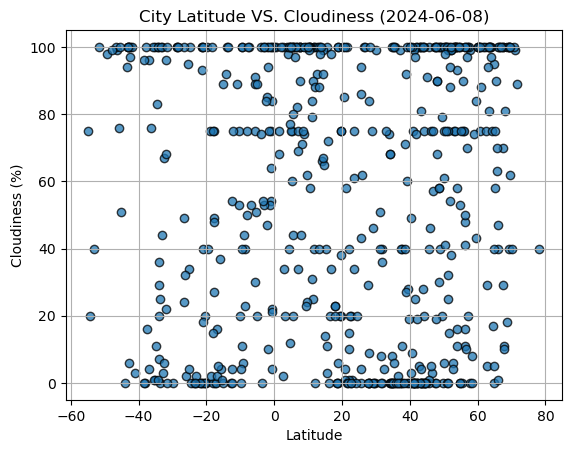

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o", edgecolors = "black", alpha = 0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude VS. Cloudiness (2024-06-08)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

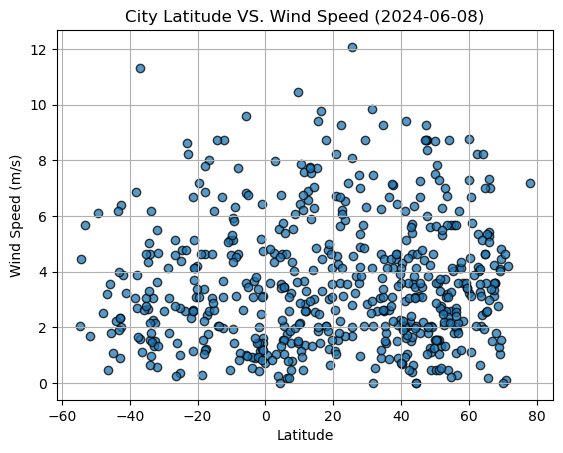

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o", edgecolors = "black", alpha = 0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude VS. Wind Speed (2024-06-08)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
import scipy.stats as st

latitude_temperature = (f"{round(st.pearsonr(city_data_df['Lat'], city_data_df['Max Temp'])[0],2)}")
latitude_humidity = (f"{round(st.pearsonr(city_data_df['Lat'], city_data_df['Humidity'])[0],2)}")
latitude_cloudiness = (f"{round(st.pearsonr(city_data_df['Lat'], city_data_df['Cloudiness'])[0],2)}")
latitude_windspeed = (f"{round(st.pearsonr(city_data_df['Lat'], city_data_df['Wind Speed'])[0],2)}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, ["City", 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date']]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,294.08,68,0,2.06,US,1718503102
1,semnan,35.5729,53.3971,298.32,43,0,1.42,IR,1718503382
2,iqaluit,63.7506,-68.5145,276.00,93,100,2.06,CA,1718503323
3,whitehorse,60.7161,-135.0538,291.10,45,75,6.69,CA,1718503274
6,igarka,67.4667,86.5833,282.60,73,70,3.13,RU,1718503382


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, ["City", 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date']]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,puerto natales,-51.7236,-72.4875,273.02,93,100,1.70,CL,1718503239
5,cafayate,-26.0730,-65.9761,284.77,81,2,1.43,AR,1718503231
8,puerto ayora,-0.7393,-90.3518,295.68,95,22,3.13,EC,1718503382
13,port-aux-francais,-49.3500,70.2167,274.68,69,98,6.12,TF,1718503383
14,edinburgh of the seven seas,-37.0676,-12.3116,288.90,94,96,11.31,SH,1718503227


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7197726157561724


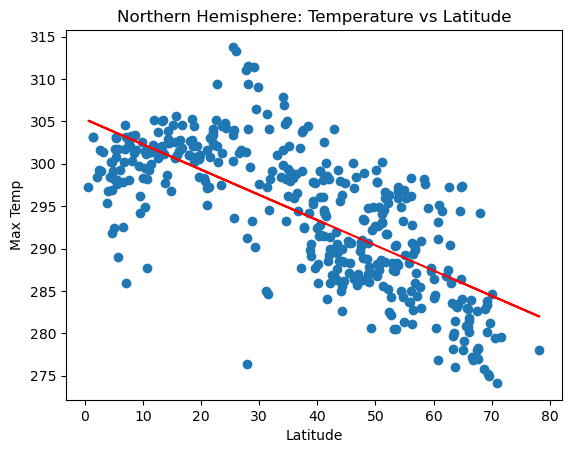

In [15]:
# Linear regression on Northern Hemisphere
print(f"The r-value is: {round(st.pearsonr(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])[0],16)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress((northern_hemi_df['Lat'], northern_hemi_df['Max Temp']))
regress_values = (northern_hemi_df['Lat']) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere: Temperature vs Latitude")

plt.show()

The r-value is: 0.7781105978159873


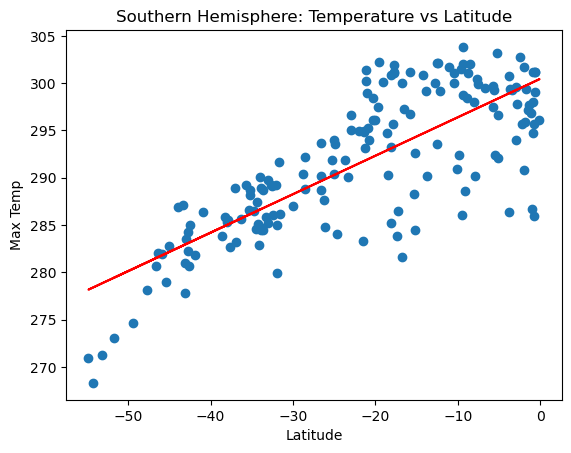

In [16]:
# Linear regression on Southern Hemisphere
print(f"The r-value is: {round(st.pearsonr(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])[0],16)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress((southern_hemi_df['Lat'], southern_hemi_df['Max Temp']))
regress_values = (southern_hemi_df['Lat']) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-25,-5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere: Temperature vs Latitude")

plt.show()

**Discussion about the linear relationship:** 

Northern Hemisphere: There is a negative correlation between the max. temperature and the latitude; as the latitude increases, the max. temperature goes down.

Southern Hemisphere: There is a positive correlation between the max. temperature and the latitude; as the latitude increases, the max. temperature goes up.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.0061949522853879


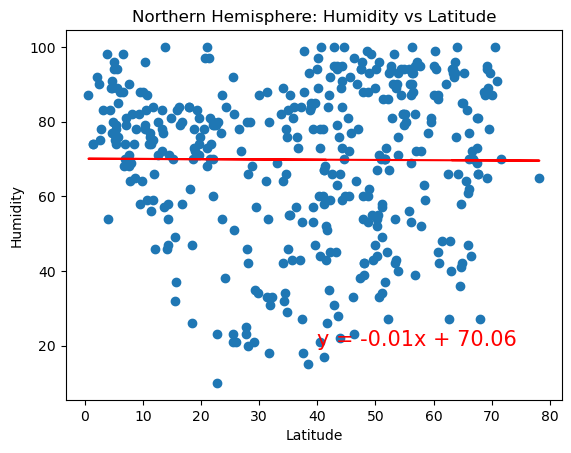

In [17]:
# Northern Hemisphere
print(f"The r-value is: {round(st.pearsonr(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])[0],16)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress((northern_hemi_df['Lat'], northern_hemi_df['Humidity']))
regress_values = (northern_hemi_df['Lat']) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere: Humidity vs Latitude")

plt.show()

The r-value is: 0.0607228951582764


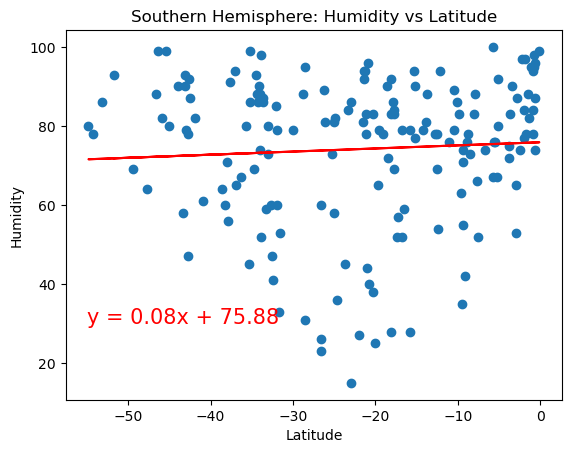

In [18]:
# Southern Hemisphere
print(f"The r-value is: {round(st.pearsonr(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])[0],16)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress((southern_hemi_df['Lat'], southern_hemi_df['Humidity']))
regress_values = (southern_hemi_df['Lat']) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere: Humidity vs Latitude")

plt.show()

**Discussion about the linear relationship:** 

Northern Hemisphere: There is a negligible correlation between the humidity and the latitude; as the latitude increases, the humidity remains almost unchanged

Southern Hemisphere: There is a slight positive correlation between the humidity and the latitude; as the latitude increases, the humidity increases slightly

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0247633373271711


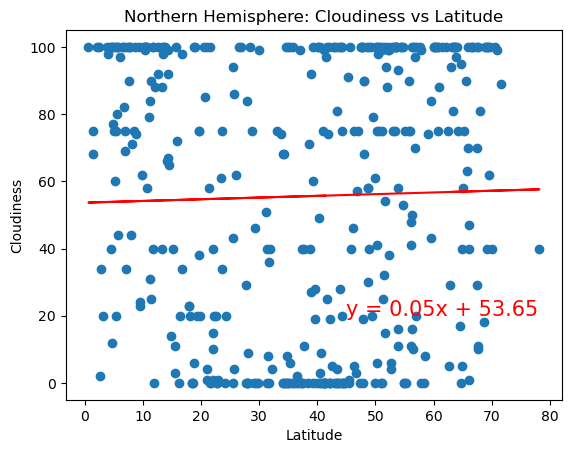

In [19]:
# Northern Hemisphere
print(f"The r-value is: {round(st.pearsonr(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])[0],16)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress((northern_hemi_df['Lat'], northern_hemi_df['Cloudiness']))
regress_values = (northern_hemi_df['Lat']) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere: Cloudiness vs Latitude")

plt.show()

The r-value is: -0.0315991458426949


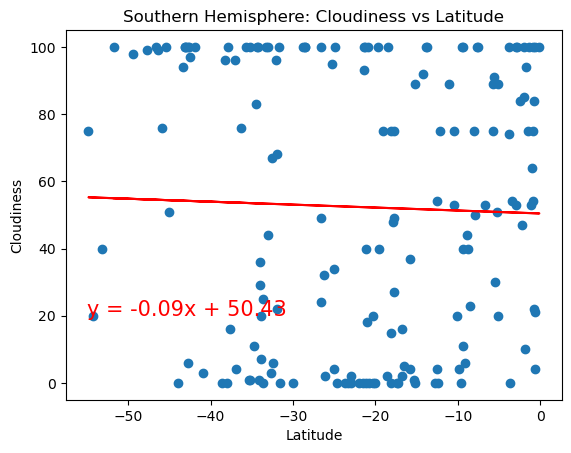

In [20]:
# Southern Hemisphere
print(f"The r-value is: {round(st.pearsonr(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])[0],16)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress((southern_hemi_df['Lat'], southern_hemi_df['Cloudiness']))
regress_values = (southern_hemi_df['Lat']) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere: Cloudiness vs Latitude")

plt.show()

**Discussion about the linear relationship:** 

Northern Hemisphere: There is a slight positive correlation between the cloudiness and the latitude; as the latitude increases, the cloudiness subtly increases

Southern Hemisphere: There is a slight negative correlation between the humidity and the latitude; as the latitude increases, the cloudiness subtly decreases

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.0256706357529794


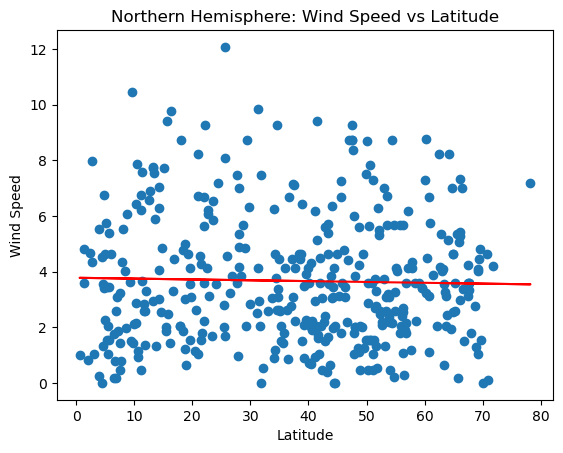

In [21]:
# Northern Hemisphere
print(f"The r-value is: {round(st.pearsonr(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])[0],16)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress((northern_hemi_df['Lat'], northern_hemi_df['Wind Speed']))
regress_values = (northern_hemi_df['Lat']) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(0,14),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere: Wind Speed vs Latitude")

plt.show()

The r-value is: 0.005987363516105


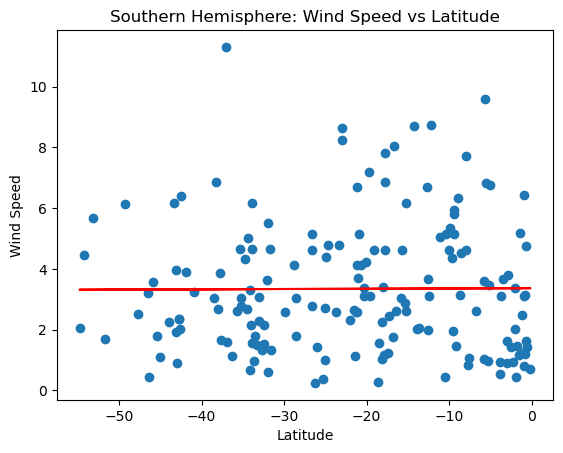

In [22]:
# Southern Hemisphere
print(f"The r-value is: {round(st.pearsonr(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])[0],16)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress((southern_hemi_df['Lat'], southern_hemi_df['Wind Speed']))
regress_values = (southern_hemi_df['Lat']) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-25,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere: Wind Speed vs Latitude")

plt.show()

**Discussion about the linear relationship:** 

Northern Hemisphere: There is a subtle negative correlation between the wind speed and the latitude; as the latitude increases, the wind speed goes down slightly.

Southern Hemisphere: There is a negligible correlation between the wind speed and the latitude; there is almost no change in the wind speed as the latitide increases.